# **Data Science + AI**

Utilizaremos dois métodos de previsão: **linear regression** e **random forecast**

O desafio é uma forma previsível pois há forte correlação entre os elementos. Nesse caso, não há envolvimento de clusting ou de 
relações sociais cuja modelagem não da para ser avaliada utilizando as estatísticas mais convencionais. 

----------------------

## **Desafio**

Prever as vendas (**milhões**) de uma empresa através dos investimentos em TV; jornal e; rádio (**mil**). 

**PASSO A PASSO PARA CONSTRUÇÃO DE UMA INTELIGÊNCIA ARTIFICIAL:**

        1) Entendimento do desafio. Tal etapa nos dinecionará a conclusões sobre os resultados (90% é bom ou ruim? Depende).
        2) Importação da base de dados + Tratamento de dados (Análise).
        3) Análise exploratória (Observar as correlações).
        4) Modelagem. 
        5) Interpretação. 
        

In [15]:
import pandas as pd # Biblioteca relacionada à análise de dados
import seaborn as sns # Importação de gráficos
import matplotlib.pyplot as plt #Importação de gráficos 
from sklearn.model_selection import train_test_split # AI
from sklearn import metrics # AI

In [8]:
frame = pd.read_csv("advertising.csv")
frame

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [9]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## **Visualização do comportamento de cada variável**

** Correlação entre duas variáveis **

    A    B  ---- Ambas as variáveis se relacionam muito bem. Enquanto uma sobe, a outra também tende a aumentar (mesmo que não 
    2    4       seja proporcional). Logo, elas estão bem correlacionadas. 
    5    8       
    7   10
    
A correlação é resitrita em um intervalo de [-1; 1]

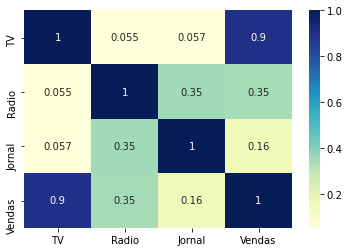

In [11]:
sns.heatmap(frame.corr(), annot=True, cmap="YlGnBu")
plt.show()

**Quanto maior o investimento em TV, maior serão as arrecadações das vendas, uma vez que a correlação entre elas são muito fortes.**

# **AI**

São duas estapas envolvidas na contrução de uma inteligência artificial:

    1°) Base de treino - Separo alguns dados que eu irei utilizar para a contrução da AI. De modo que ela compreenda como deve realizar a previsão. 
    
    2°) Base de teste - Valores cujas variáveis independentes serão dadas como argumento e iremos comparar as saidas com os valores reais.

***X*** = Investimentos (O que usamos para fazer previsão)

***Y*** = Vendas (O que queremos prever)
    

In [13]:
y = frame['Vendas']
x = frame[['TV', 'Jornal', 'Radio']]

In [19]:
# Da nossa base original, o algoritmo separa 20% para teste e 80 % para treino (default) de forma aleatória.
# Para mudar a proporação: teste_size = porcentagem_para_teste
# random_state =  Gerar apenas uma vez os valores aleatórios

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1) 

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [22]:
#Cria as inteligências artificiais - declara duas variáveis que receberão as funções de regressão linear e de árvore de decisão.
model_linear_regressor = LinearRegression()
model_random_forecast = RandomForestRegressor()

#Treina 
model_linear_regressor.fit(x_train,y_train)
model_random_forecast.fit(x_train,y_train)

RandomForestRegressor()

In [24]:
forecast_linear_regressor = model_linear_regressor.predict(x_test)
forecast_random_forecast = model_random_forecast.predict(x_test)

**Teste do R² será uma forma de avaliarmos o quão próximas as estimativas estão dos valores reais.***

In [26]:
metrics.r2_score(y_test,forecast_linear_regressor)

0.904891724136168

In [27]:
metrics.r2_score(y_test,forecast_random_forecast)

0.9652554193882689

## **Estimar nova previsão**

Iremos utilizar a àrvore de decisões, uma vez que ela apresentou estimativas mais precisas. 

In [30]:
new_data = pd.read_csv('novos.csv')

estimates = model_random_forecast.predict(new_data)
new_data ['Estimativas de vendas'] = estimates

ne